In [42]:
#Installing and Importing 
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing the files.
df = pd.read_csv("credit_risk.csv")

In [6]:
#identify the non_null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [59]:
#Cleaning the files_identifying null cells.
print("Indentifying null cells.")
df.isnull().sum()

Indentifying null cells.


Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [6]:
print("Getting general statics")
df.describe()

Getting general statics


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [43]:
#Cleaning the data# with mode and median
Rep =df[["Emp_length","Rate"]].median()
print("State the median values")
print(Rep)
print("Replacing the null cells with the median values")
dna= df[["Emp_length","Rate"]].fillna(df[["Emp_length","Rate"]].median())
df[["Emp_length","Rate"]]=dna
df.isnull().sum()
print(df.info())

State the median values
Emp_length     4.00
Rate          10.99
dtype: float64
Replacing the null cells with the median values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  int64  
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  int64  
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 3.0+ MB
None


In [99]:
#Cleaning the data with ffill and bfill#
dn= df.ffill().bfill()
#Reconfirming the cleaned new df#
dn.isnull().sum()
print(dn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB
None


In [101]:
print("Getting general statics of new dataframe")
dn.describe()


Getting general statics of new dataframe


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [107]:
# Creat a new dataframe of for Age, Amount, Rate, Percent-income identifying the mean, std, and median and mode
dff = dn[["Age", "Amount", "Rate", "Percent_income"]].agg(["mean", "std", "median"])
dfi = dn[["Age", "Amount", "Rate", "Percent_income"]].agg(["mode"])
print("The statics of Age, Amount, Rate and Percent_income")
print(dff)
print(dfi)
print('The statics variables for Age are closely ranged, which implies that most staff are around the same age.')
print("The statics variables for Amount indicates the staff loan values are not the same, they are not consistent with each other, they are spread out")
print("The statics variable for Rate indicates that the average interest rate is 11%.")
print("17% of most staff income is used to defray their loan obligations")
print("Most of the staff took a loan value of 10,000 and are around the age of 23")

The statics of Age, Amount, Rate and Percent_income
              Age       Amount       Rate  Percent_income
mean    27.734600  9589.371106  11.009620        0.170203
std      6.348078  6322.086646   3.081611        0.106782
median  26.000000  8000.000000  10.990000        0.150000
   Age Amount   Rate Percent_income
  mode   mode   mode           mode
0   23  10000  10.99            0.1
The statics variables for Age are closely ranged, which implies that most staff are around the same age.
The statics variables for Amount indicates the staff loan values are not the same, they are not consistent with each other, they are spread out
The statics variable for Rate indicates that the average interest rate is 11%.
17% of most staff income is used to defray their loan obligations
Most of the staff took a loan value of 10,000 and are around the age of 23


In [277]:
#Provide a summary of the categorical variables like Home, Intent, and Default using value counts.
print("The categorical variables of Home, Intent and Default")
print(dn[["Home", "Intent", "Default"]].nunique() )
dn[["Home", "Intent", "Default"]].value_counts() 


The categorical variables of Home, Intent and Default
Home       4
Intent     6
Default    2
dtype: int64


Home      Intent             Default
RENT      MEDICAL            N          2773
          EDUCATION          N          2657
          DEBTCONSOLIDATION  N          2257
MORTGAGE  EDUCATION          N          2240
RENT      VENTURE            N          2161
          PERSONAL           N          2150
MORTGAGE  PERSONAL           N          2025
          DEBTCONSOLIDATION  N          1975
          VENTURE            N          1879
          MEDICAL            N          1859
          HOMEIMPROVEMENT    N          1472
RENT      HOMEIMPROVEMENT    N          1170
OWN       VENTURE            N           667
RENT      MEDICAL            Y           657
          EDUCATION          Y           624
          PERSONAL           Y           567
          DEBTCONSOLIDATION  Y           554
          VENTURE            Y           512
OWN       EDUCATION          N           443
MORTGAGE  EDUCATION          Y           387
OWN       PERSONAL           N           373
          MEDICAL 

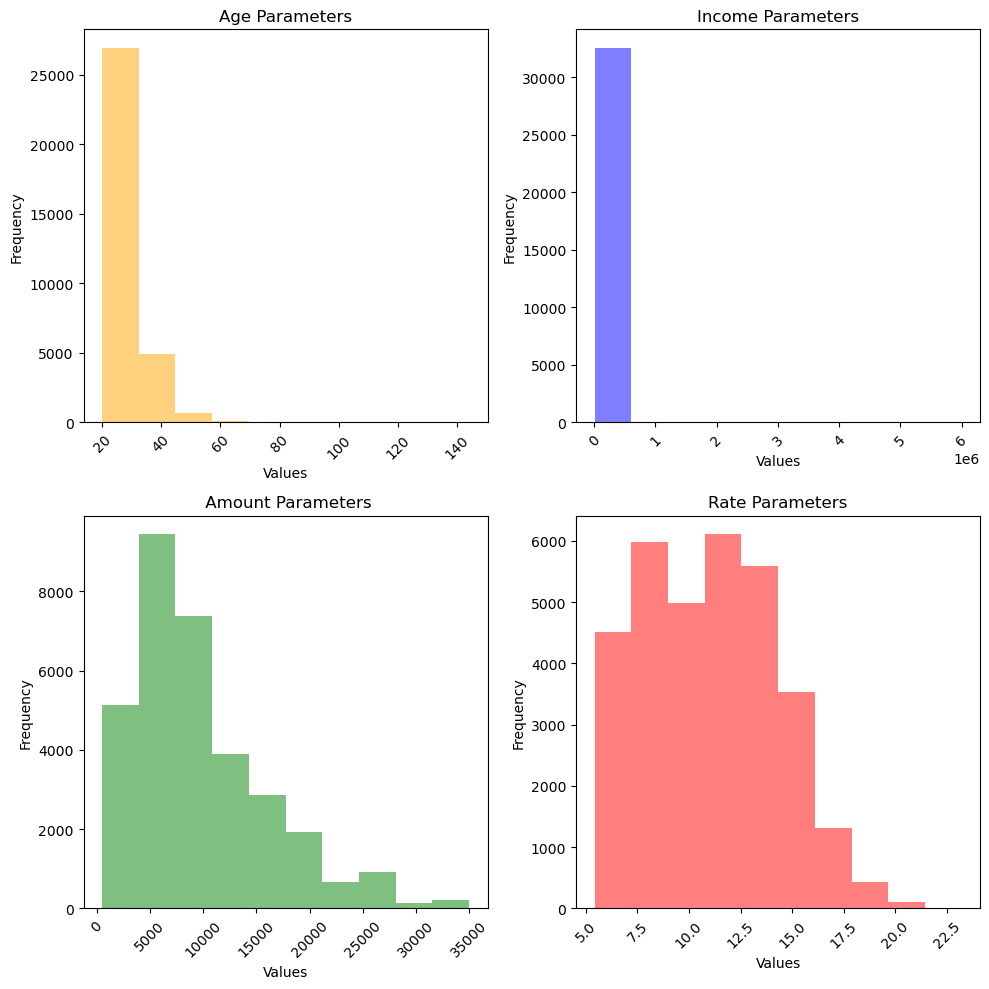

In [261]:
#Create histograms for Age, Income, Amount, Rate, and Cred_length to understand their distributions

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

#The first subplot counting clockwise from the left
ax[0,0].hist(dn["Age"], bins=10, color = "orange", alpha =0.5, ) 
ax[0,0].set_title("Age Parameters")
ax[0,0].set_xlabel("Values")
ax[0,0].set_ylabel("Frequency")
ax[0,0].tick_params(axis='x', rotation=45)

#The second subplot counting clockwise from the left
ax[0,1].hist(dn["Income"], bins=10, color = "blue", alpha =0.5)
ax[0,1].set_title("Income Parameters")
ax[0,1].set_xlabel("Values")
ax[0,1].set_ylabel("Frequency")
ax[0,1].tick_params(axis='x', rotation=45)


#The fourth subplot counting clockwise from the left
ax[1,0].hist(dn["Amount"], bins=10, color = "green", alpha =0.5)
ax[1,0].set_title(" Amount Parameters")
ax[1,0].set_xlabel("Values")
ax[1,0].set_ylabel("Frequency")
ax[1,0].tick_params(axis='x', rotation=45)

#The third subplot counting clockwise from the left
ax[1,1].hist(dn["Rate"], bins=10, color = "red", alpha =0.5)
ax[1,1].set_title("Rate Parameters")
ax[1,1].set_xlabel("Values")
ax[1,1].set_ylabel("Frequency")
ax[1,1].tick_params(axis='x', rotation=45)

#Ensures plot dont overlap
plt.tight_layout()
plt.show()

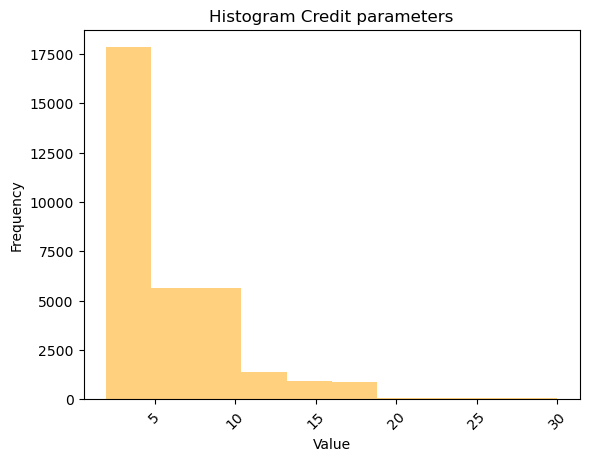

In [265]:
#Create histograms for Age, Income, Amount, Rate, and Cred_length to understand their distributions

#Define the data for the histogram
#data=dn[["Age", "Income", "Amount", "Rate", "Cred_length"]]
# Create a histogram
plt.hist(dn["Cred_length"], bins=10, color = "orange", alpha =0.5)
# Customize the plot
plt.title('Histogram Credit parameters')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the histogram
plt.show()

<Figure size 640x480 with 0 Axes>

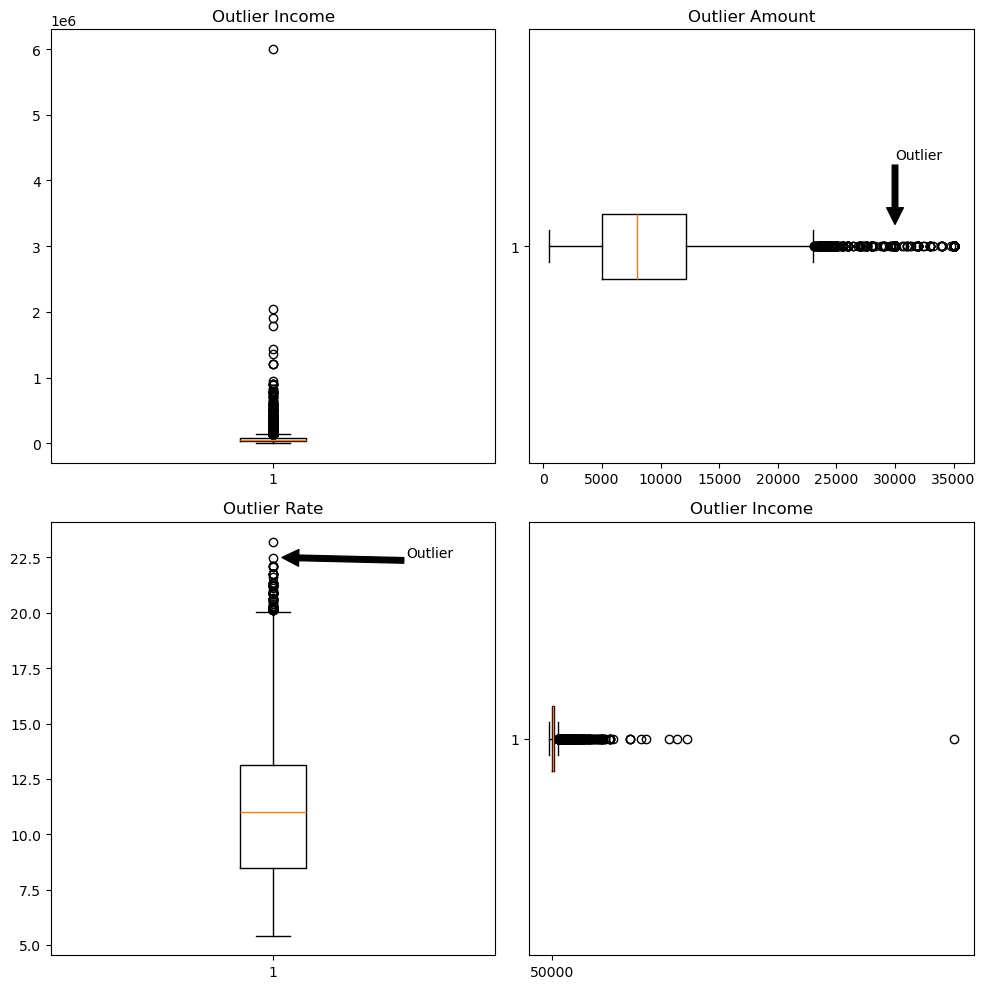

In [109]:
fig = plt.figure()
#plt.boxplot(dn["Income"], vert=False, fig size(10,12))

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))


#ticks = np.arange(0.005, 4500, step=5000)


#The first subplot counting clockwise from the left
ax[0,0].boxplot(dn["Income"], vert=True) # can create multiple plots in same subplot
ax[0,0].set_title("Outlier Income")
#ax[0,0].set_yticks(ticks)

#The second subplot counting clockwise from the left
ax[0,1].boxplot(dn["Amount"], vert=False)
ax[0,1].set_title("Outlier Amount")
ax[0,1].annotate('Outlier', xy=(30000, 1.05), xytext=(30000, 1.2), arrowprops=dict(facecolor='black'))

#The fourth subplot counting clockwise from the left
ax[1,0].boxplot(dn["Rate"], vert=True)
ax[1,0].set_title("Outlier Rate")
ax[1,0].annotate('Outlier', xy=(1.02, 22.5 ), xytext=(1.3,22.5 ), arrowprops=dict(facecolor='black'))

#The third subplot counting clockwise from the left
tick = np.arange(50000, 100000, step=100000)
ax[1,1].boxplot(dn["Income"], vert=False)
ax[1,1].set_title("Outlier Income")
ax[1,1].set_xticks(tick)
#ax[1,1].annotate('Outlier', xy=(22.5, 1.05), xytext=(22.5, 1.2), arrowprops=dict(facecolor='black'))

#Ensures plot dont overlap
plt.tight_layout()
plt.show()

In [ ]:
Plot bar charts for categorical variables such as Home, Intent, and Default to see their distribution across the dataset.

<Figure size 640x480 with 0 Axes>

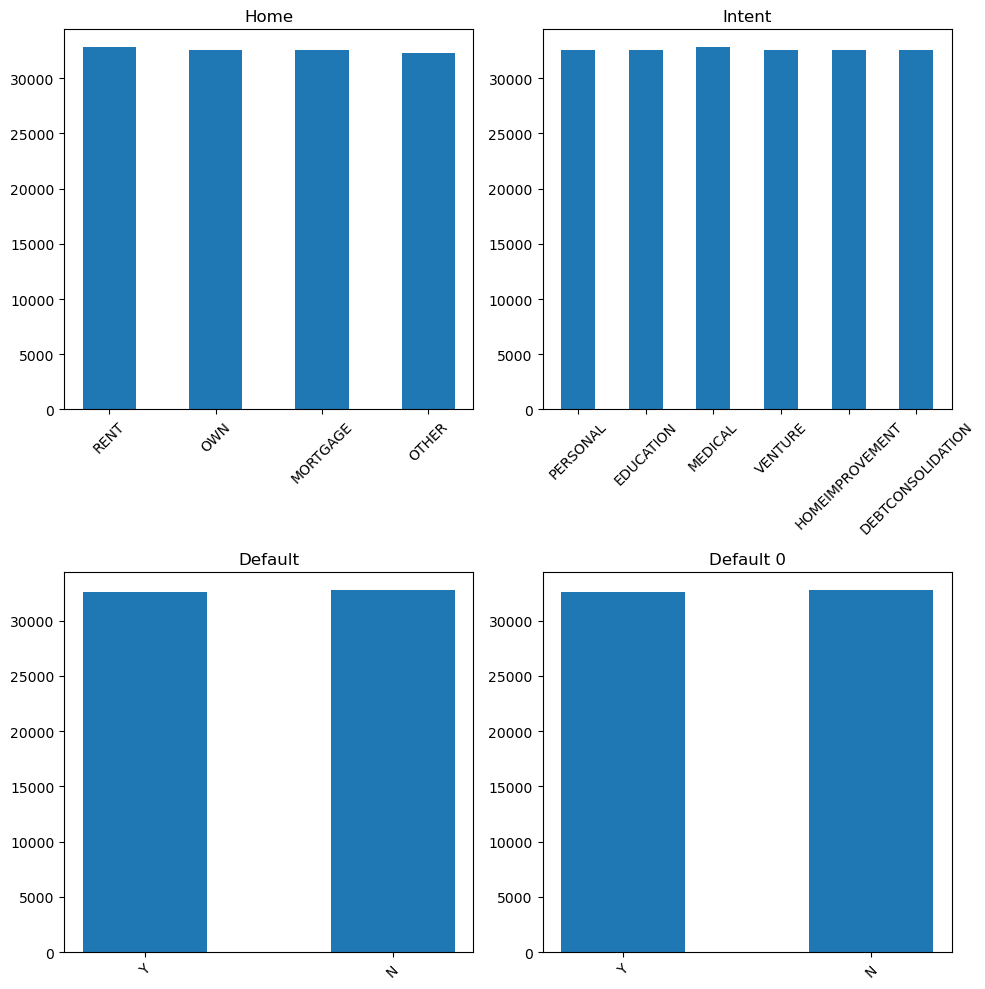

In [207]:

fig = plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

#The first subplot counting clockwise from the left
#sns.countplot(data=df, x="Home", y="Id", ax[0,0])
ax[0,0].bar(dn["Home"], dn["Id"], width =0.5)
ax[0,0].set_title("Home")
ax[0,0].tick_params(axis='x', labelrotation=45, labelsize=10)

#The second subplot counting clockwise from the left
#sns.countplot(data=df, x="Intent", y="Id",ax[0,1])
ax[0,1].bar(dn["Intent"], dn["Id"], width =0.5)
ax[0,1].set_title("Intent")
ax[0,1].tick_params(axis='x', labelrotation=45, labelsize=10)

#The fourth subplot counting clockwise from the left
#sns.countplot(  data=df, x="Default", y="Id", ax[1,0])
ax[1,0].bar(dn["Default"], dn["Id"], width =0.5)
ax[1,0].set_title("Default")
ax[1,0].tick_params(axis='x', labelrotation=45, labelsize=10)

#The third subplot counting clockwise from the left
#sns.countplot(data=df, x="Default", y="Id", ax[1,1])
ax[1,1].bar(dn["Default"], dn["Id"], width =0.5)
ax[1,1].set_title("Default 0")
ax[1,1].tick_params(axis='x', labelrotation=45, labelsize=10)

#Ensures no overlapping of the plot
plt.tight_layout()
plt.show()

               Income    Amount      Rate  Cred_length
Income       1.000000  0.266820  0.000792     0.117987
Amount       0.266820  1.000000  0.146813     0.041967
Rate         0.000792  0.146813  1.000000     0.016696
Cred_length  0.117987  0.041967  0.016696     1.000000

The data above indicates that amount and income and amount and rate as well as amount and cred_length
are not strongly correlated with the correlation of 0.26, 0.14 and 0.11 respectively,
generally the vairables are not strongly positvely correlated as seen from correlation figure trending to 0

 The heatmap of the correlation


<Axes: >

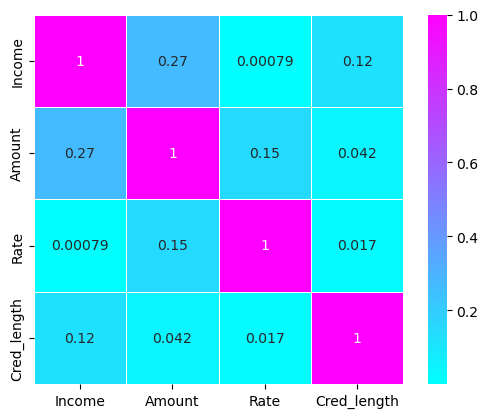

In [259]:
#Create a variable of the correlations of the variable. 
cira=df[["Income","Amount","Rate","Cred_length"]].corr()

#Print the variable.
print(cira)
print()
print("The data above indicates that amount and income and amount and rate as well as amount and cred_length")
print('are not strongly correlated with the correlation of 0.26, 0.14 and 0.11 respectively,')
print('generally the vairables are not strongly positvely correlated as seen from correlation figure trending to 0' )

print()
print(" The heatmap of the correlation")

sns.heatmap(cira, annot=True, cmap='cool', linewidths=0.5, square=True)

In [251]:
#Create the new variable by grouping empire and identify the variable of default.
Emp_de= df.groupby("Emp_length")["Default"].describe()

#print out data
print(Emp_de)

           count unique top  freq
Emp_length                       
0.0         4105      2   N  3308
1.0         2915      2   N  2347
2.0         3849      2   N  3155
3.0         3456      2   N  2785
4.0         2874      2   N  2331
5.0         2946      2   N  2475
6.0         2666      2   N  2239
7.0         2196      2   N  1815
8.0         1687      2   N  1419
9.0         1367      2   N  1133
10.0         696      2   N   587
11.0         740      2   N   609
12.0         575      2   N   488
13.0         426      2   N   368
14.0         335      2   N   283
15.0         238      2   N   201
16.0         165      2   N   150
17.0         129      2   N   101
18.0         104      2   N    85
19.0          64      2   N    50
20.0          42      2   N    34
21.0          38      2   N    32
22.0          19      2   N    15
23.0          10      2   N     8
24.0          10      1   N    10
25.0           8      2   N     7
26.0           6      1   N     6
27.0          

<Figure size 640x480 with 0 Axes>

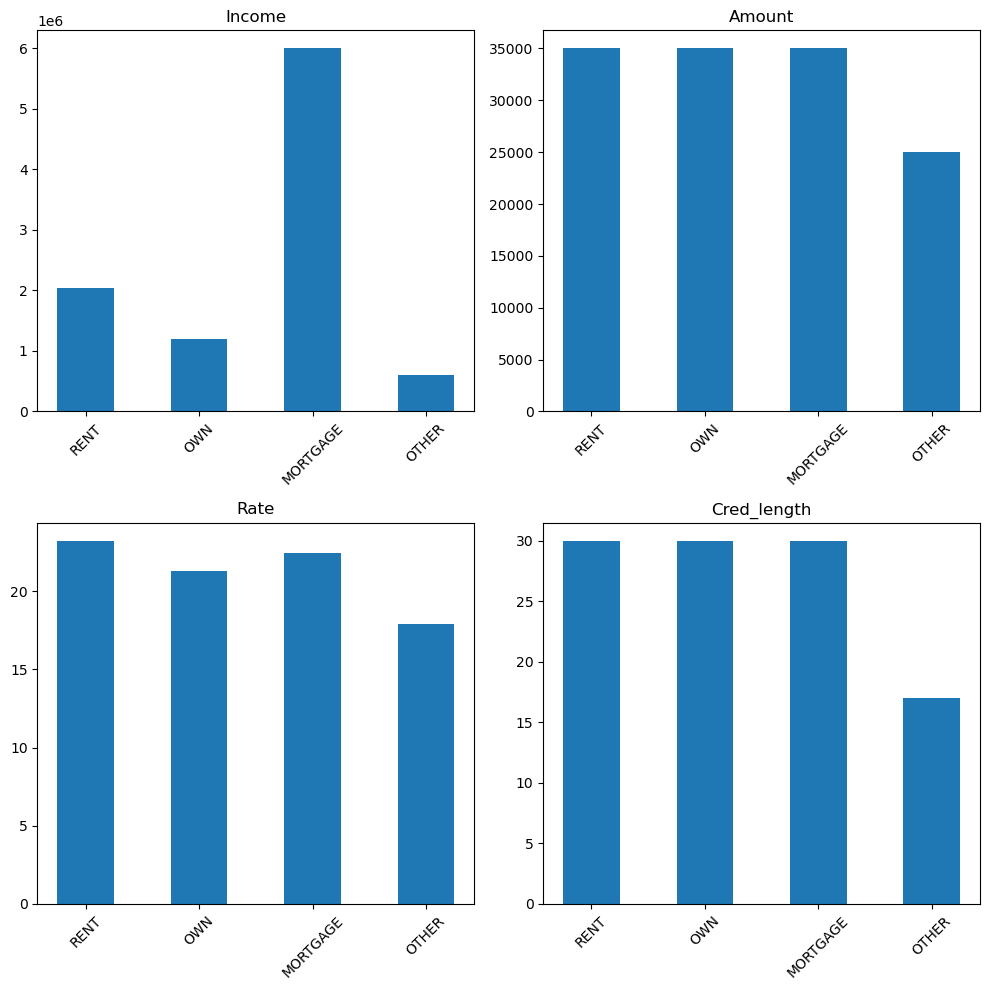

In [209]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))


#The first subplot counting clockwise from the left
#sns.countplot(data=df, x="Home", y="Id", ax[0,0])
ax[0,0].bar(dn["Home"], dn["Income"], width =0.5)
ax[0,0].set_title("Income")
ax[0,0].tick_params(axis='x', labelrotation=45, labelsize=10)

#The second subplot counting clockwise from the left
#sns.countplot(data=df, x="Intent", y="Id",ax[0,1])
ax[0,1].bar(dn["Home"], dn["Amount"], width =0.5)
ax[0,1].set_title("Amount")
ax[0,1].tick_params(axis='x', labelrotation=45, labelsize=10)

#The third subplot counting clockwise from the left
#sns.countplot(  data=df, x="Default", y="Id", ax[1,0])
ax[1,0].bar(dn["Home"], dn["Rate"], width =0.5)
ax[1,0].set_title("Rate")
ax[1,0].tick_params(axis='x', labelrotation=45, labelsize=10)


#The fourth subplot counting clockwise from the left
#sns.countplot(data=df, x="Default", y="Id", ax[1,1])
ax[1,1].bar(dn["Home"], dn["Cred_length"], width =0.5)
ax[1,1].set_title("Cred_length")
ax[1,1].tick_params(axis='x', labelrotation=45, labelsize=10)

#Ensure plot dont overlap
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

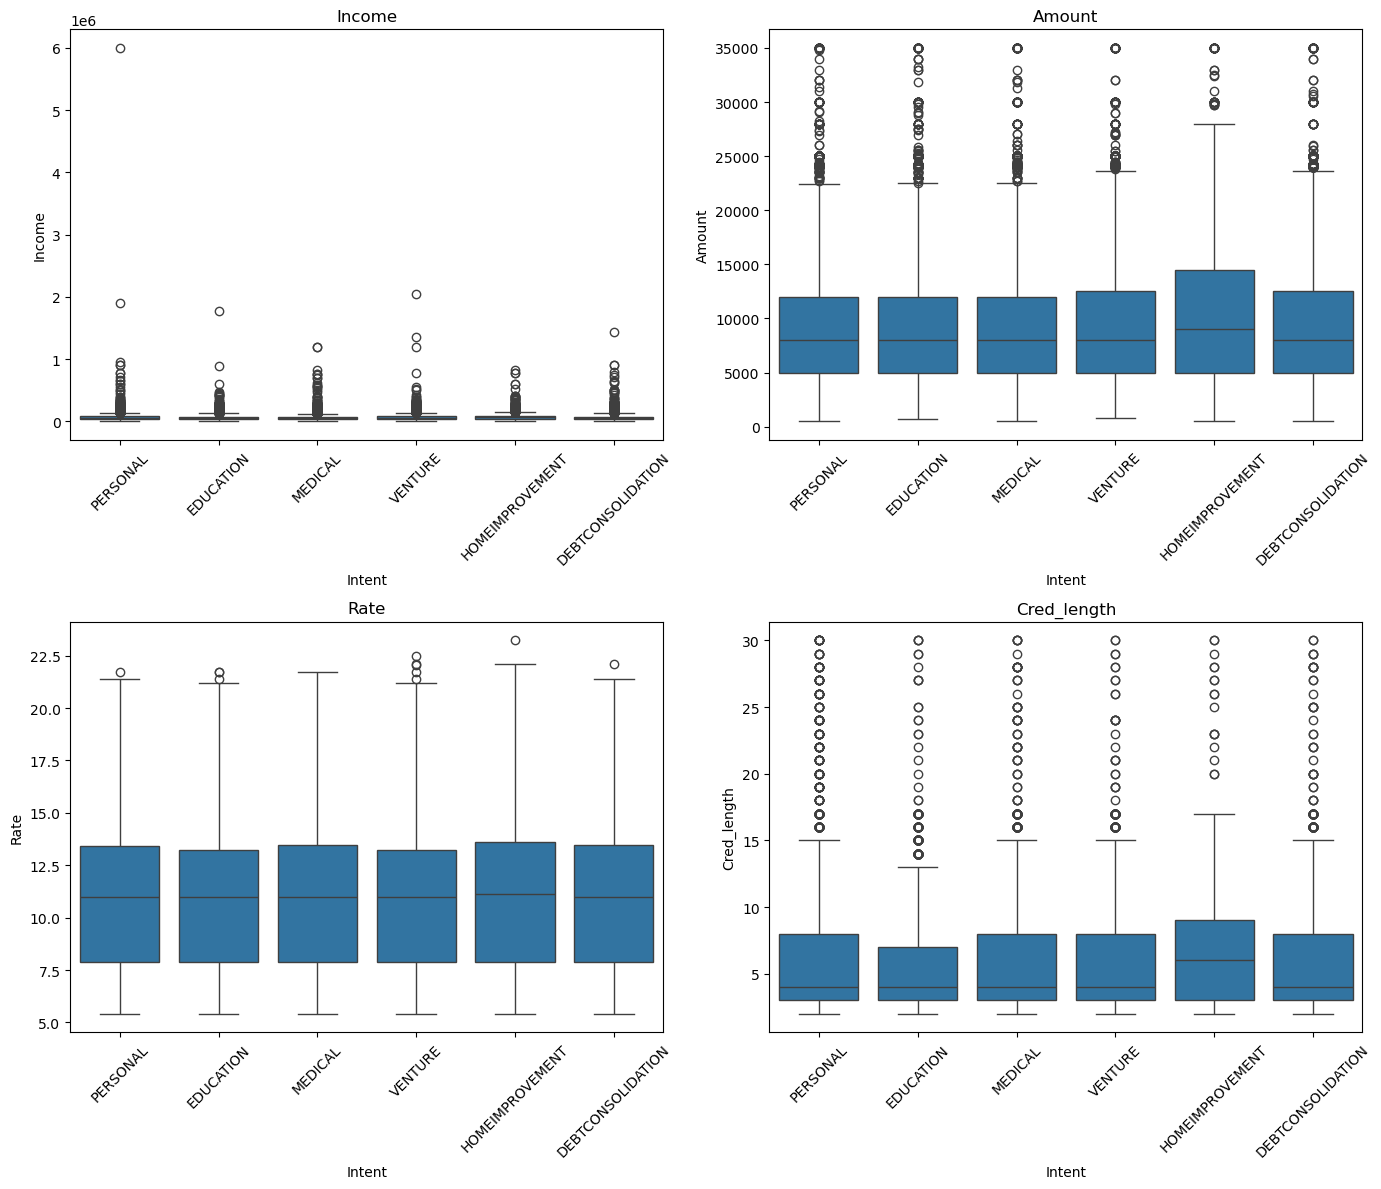

In [277]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,12))

Boxy = df[["Intent","Income","Amount","Rate"]].groupby("Intent")


#Emp_de= df.groupby("Emp_length")["Default"].describe()

#The first subplot counting clockwise from the left
sns.boxplot(x='Intent', y='Income', data=df, ax=axes[0, 0])
axes[0,0].set_title("Income")
axes[0,0].tick_params(axis='x', labelrotation=45, labelsize=10)


#The second subplot counting clockwise from the left
sns.boxplot(x='Intent', y='Amount', data=df, ax=axes[0, 1])
axes[0,1].set_title("Amount")
axes[0,1].tick_params(axis='x', labelrotation=45, labelsize=10)


#The fourth subplot counting clockwise from the left
sns.boxplot(x='Intent', y='Rate', data=df, ax=axes[1, 0])
axes[1,0].set_title("Rate")
axes[1,0].tick_params(axis='x', labelrotation=45, labelsize=10)

#The third subplot counting clockwise from the left
sns.boxplot(x='Intent', y='Cred_length', data=df, ax=axes[1, 1])
axes[1,1].set_title("Cred_length")
axes[1,1].tick_params(axis='x', labelrotation=45, labelsize=10)

#Ensure plot dont overlap
plt.tight_layout()
plt.show()

In [ ]:
Calculate the probability of defaulting on a loan given different levels of Income, Age, or Home ownership status.

In [80]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [106]:
#Encode categorical variables of Home and Default with figures

#Repp = df[["Home","Default"]].replace({"MORTGAGE": 1, "RENT": 2, "OWN": 3, "OTHER": 4}, {"Y":1,"N": 2})

df = df.replace({"MORTGAGE": 2, "RENT": 1, "OWN": 3, "OTHER": 4, "Y":2,"N": 1})
print(df)


          Id  Age  Income  Home  Emp_length           Intent  Amount   Rate  \
0          0   22   59000     2       123.0         PERSONAL   35000  16.02   
1          1   21    9600     3         5.0        EDUCATION    1000  11.14   
2          2   25    9600     1         1.0          MEDICAL    5500  12.87   
3          3   23   65500     2         4.0          MEDICAL   35000  15.23   
4          4   24   54400     2         8.0          MEDICAL   35000  14.27   
...      ...  ...     ...   ...         ...              ...     ...    ...   
32576  32576   57   53000     1         1.0         PERSONAL    5800  13.16   
32577  32577   54  120000     1         4.0         PERSONAL   17625   7.49   
32578  32578   65   76000     2         3.0  HOMEIMPROVEMENT   35000  10.99   
32579  32579   56  150000     1         5.0         PERSONAL   15000  11.48   
32580  32780   66   42000     2         2.0          MEDICAL    6475   9.99   

       Status  Percent_income  Default  Cred_length

In [108]:

x = df[['Income', 'Age', 'Home']]
y = df['Default']

# Split the data into training and testing sets
x.sca= sklearn.preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x.sca, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)
probabilities = model.predict_proba(x_test)[:, 1]

pd.DataFrame({
    'Income': x_test[:,0],
    'Age': x_test[:,1],
    'Home': x_test[:, 2],
    'Probability of Default': probabilities
})

# show case peeps with higher probability of not defaulting

C:\Users\lizzy\AppData\Local\Temp\ipykernel_22316\728084508.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.sca= sklearn.preprocessing.StandardScaler().fit_transform(x)


,Income,Age,Home,Probability of Default
0,-0.614287,-0.588313,2.102227,0.788118
1,-0.033475,-0.115722,0.517739,0.816356
2,0.095594,-0.273252,-1.066749,0.842543
3,-0.614352,-0.745843,0.517739,0.817363
4,-0.348082,0.356869,0.517739,0.815205
...,...,...,...,...
9770,0.063327,1.617113,0.517739,0.812771
9771,1.354021,-0.115722,-1.066749,0.842835
9772,-0.756263,0.829461,0.517739,0.813998
9773,0.490869,0.199339,0.517739,0.815974


# 

In [114]:
x = df[["Age","Income", "Emp_length", "Amount", "Rate","Home"]]
y = df['Default']

# Split the data into training and testing sets
x.sca= sklearn.preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x.sca, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict the target values for the test set
probabilities = model.predict_proba(x_test)[:, 1]


# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


pd.DataFrame({
    'Age': x_test[:,0],
    'Income': x_test[:,1],
    'Emp_length': x_test[:, 2],
    'Amount': x_test[:,3],
    'Rate': x_test[:,4],
    'Home': x_test[:, 5],
    'Probability of Default': probabilities
})



Model Accuracy: 0.8259

Confusion Matrix:
[[ 516 1222]
 [ 480 7557]]

Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.30      0.38      1738
           2       0.86      0.94      0.90      8037

    accuracy                           0.83      9775
   macro avg       0.69      0.62      0.64      9775
weighted avg       0.80      0.83      0.81      9775



C:\Users\lizzy\AppData\Local\Temp\ipykernel_22316\834675078.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.sca= sklearn.preprocessing.StandardScaler().fit_transform(x)


,Age,Income,Emp_length,Amount,Rate,Home,Probability of Default
0,-0.588313,-0.614287,0.301422,0.064952,-0.207563,2.102227,0.928140
1,-0.115722,-0.033475,-1.166536,0.064952,1.382538,0.517739,0.485107
2,-0.273252,0.095594,1.280061,1.014021,-0.006367,-1.066749,0.912932
3,-0.745843,-0.614352,0.546082,0.064952,-0.006367,0.517739,0.904090
4,0.356869,-0.348082,-0.677217,0.539487,1.723274,0.517739,0.362761
...,...,...,...,...,...,...,...
9770,1.617113,0.063327,-0.677217,-0.725938,0.457683,0.517739,0.802332
9771,-0.115722,1.354021,-0.677217,1.330377,-0.006367,-1.066749,0.911948
9772,0.829461,-0.756263,-1.166536,-0.251404,-1.086987,0.517739,0.981282
9773,0.199339,0.490869,2.014041,0.064952,-0.691084,0.517739,0.967437


In [138]:
print("                   THE MODEL RESULTS ANALYSIS               ")
print("The model accuracy is 82.59% for a finance industry that is quite low,thus the model has to be reviewed,it probably currently has many independent variables creating noise.")
print("There is need to streamline the number of relevant independent vairables and review the relationship between the variables that will reflect the")
print("relations of focus,for instance age may not indicate default with high level of income nor lenght of emp indicate likely default, other variable ")
print("may also be considered like other exiting obligation.The data has more population of those that did not default over those that default, the model")
print("tends to lean to that direction,thus it accurately predicts more of those that dont default over those that default, having 86% of accurately ")
print("prediciting those that do not default over 52% of accurately predicting those that default.")

                   THE MODEL RESULTS ANALYSIS               
The model accuracy is 82.59% for a finance industry that is quite low,thus the model has to be reviewed,it probably currently has many independent variables creating noise.
There is need to streamline the number of relevant independent vairables and review the relationship between the variables that will reflect the
relations of focus,for instance age may not indicate default with high level of income nor lenght of emp indicate likely default, other variable 
may also be considered like other exiting obligation.The data has more population of those that did not default over those that default, the model
tends to lean to that direction,thus it accurately predicts more of those that dont default over those that default, having 86% of accurately 
prediciting those that do not default over 52% of accurately predicting those that default.
